# Working with time series

files needed = ('vix.csv', 'osk.csv')

Time series data are very common in finance and economics. Date and time systems have their own set of rules and logic, which makes them potentially complicated but powerful. Python/`pandas` have a very powerful set of tools to handle dates and time. We will work through the basics here. As always, the Internet is full of the details. 

In this workbook, we will cover:
1. The datetime data type, which is python's representation of a date and time
2. Setting up a DataFrame to index with datetime objects
3. Plotting time series data
4. Changing the frequency of our date, e.g., converting daily data to monthly
5. Slicing on dates

## The packages

In [1]:
import pandas as pd               
import matplotlib.pyplot as plt  

# Data types and methods for dealing with dates and time. Name it dt for short.
import datetime as dt                

### The datetime type
Python uses the `datetime` type of object to hold date and time data. This allows for very sophisticated handling of time series data. Most of this is beyond the scope of our work, but if you ever find yourself having to deal with time zones or which week of the month a date lies in, datetime has you covered. \[Python was developed to do a lot more than data analysis...\]

We will mostly need to create datetime objects to hold dates. We pass datetime objects to methods that need to know about dates. 

In [2]:
# year, month, date (datetime will add a time code of 00:00:00)
time_1 = dt.datetime(1776, 7, 4)  
print('Declare independence on:', time_1)

Declare independence on: 1776-07-04 00:00:00


What kind of object do we have?

In [3]:
type(time_1)

datetime.datetime

### datetime to str
We can convert a datetime object to different string outputs using the `strftime()` method. It takes formatting codes as arguments and you can format the string however you wish. I added a comma. A list of codes is in table 11-3 of McKinney. You can find them in the documentation [here](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes).

In [4]:
# I have no idea why month is 'B'.
print('Declare independence on:', time_1.strftime('%B %d, %Y'))     

Declare independence on: July 04, 1776


### str to datetime

We will often read dates in as strings. Converting them to datetime objects will be one of our first orders of business. We can convert strings to datetime using the same codes and the `strptime()` method. 

We pass it the template the date is written in, and it parses the string to create a datetime. It's flexibility lets us handle strange formats.

In [5]:
# Format codes make for very flexible date input.

string_date = '1815/1/8'                                 

time_2 = dt.datetime.strptime(string_date, '%Y/%m/%d')

print('Battle of New Orleans on:', time_2.strftime('%B %d, %Y'))

Battle of New Orleans on: January 08, 1815


We might need some more datetime functionality, but that should be enough for now. 

## Datatimes in pandas

We just learned about the datetime package, which allows us to explicity create datetime objects. This datetime functionality is built into pandas, too, and works similarly.  

### The data
The file 'vix.csv' contains daily end-of-trading values of the '[VIX](https://finance.yahoo.com/quote/%5EVIX/),' a measure of expected market volatility as implied by S&P 500 options. Business-news types like to refer to it as the 'fear index'. \[That's a bit too dramatic for my taste.\] The idea is that expected volatility rises when people are worried about the future. 

The data are from [FRED](https://fred.stlouisfed.org/series/VIXCLS).

In [6]:
vix = pd.read_csv('vix.csv', na_values='.')   # There are some missing values marked as '.'
vix

,DATE,VIXCLS
0,1/2/1990,17.24
1,1/3/1990,18.19
2,1/4/1990,19.22
3,1/5/1990,20.11
4,1/8/1990,20.26
...,...,...
8554,10/17/2022,31.37
8555,10/18/2022,30.50
8556,10/19/2022,30.76
8557,10/20/2022,29.98


The data look about like I would expect. What kind of variables do we have? 

In [7]:
print(vix.dtypes)

DATE       object
VIXCLS    float64
dtype: object


The 'DATE' variable is stored as a string right now. 

We use the `.to_datetime()` method of `pandas` to convert it to a datetime object.  

In [8]:
vix['DATE'] = pd.to_datetime(vix['DATE'])
vix.dtypes

DATE      datetime64[ns]
VIXCLS           float64
dtype: object

So the `to_datetime()` conversion creates `datetime64[ns]` objects. 

As we have seen with `float` and `int`, pandas adds some extra information to the type, but it is still a `datetime`. 

Notice that we did not pass a template to `.to_datetime()` like we did with `.strptime()`. If we do not pass a template, pandas will try to guess the format. If the format is "standard," it typically works. If we have data with a strange date setup, we can always supply a template. 

### A datetime in the index

It makes sense to set the index as the unit of observation. In this data, the unit of observation is a day. 

There is nothing special here. We set the index as we normally do.

In [9]:
vix_di = vix.set_index('DATE')
vix_di.index

DatetimeIndex(['1990-01-02', '1990-01-03', '1990-01-04', '1990-01-05',
               '1990-01-08', '1990-01-09', '1990-01-10', '1990-01-11',
               '1990-01-12', '1990-01-15',
               ...
               '2022-10-10', '2022-10-11', '2022-10-12', '2022-10-13',
               '2022-10-14', '2022-10-17', '2022-10-18', '2022-10-19',
               '2022-10-20', '2022-10-21'],
              dtype='datetime64[ns]', name='DATE', length=8559, freq=None)

Notice that the index object is now a `DatetimeIndex` object.

### A datetime index at import

`pd.read_csv()` and `pd.read_excel()` can handle dates when we import the data. 

In [10]:
vix = pd.read_csv('vix.csv', parse_dates=['DATE'], na_values='.')
vix.dtypes

DATE      datetime64[ns]
VIXCLS           float64
dtype: object

In [11]:
vix = pd.read_csv('vix.csv', parse_dates=['DATE'], index_col='DATE', na_values='.')
vix.index

DatetimeIndex(['1990-01-02', '1990-01-03', '1990-01-04', '1990-01-05',
               '1990-01-08', '1990-01-09', '1990-01-10', '1990-01-11',
               '1990-01-12', '1990-01-15',
               ...
               '2022-10-10', '2022-10-11', '2022-10-12', '2022-10-13',
               '2022-10-14', '2022-10-17', '2022-10-18', '2022-10-19',
               '2022-10-20', '2022-10-21'],
              dtype='datetime64[ns]', name='DATE', length=8559, freq=None)

 Now that pandas knows the index is a datetime, it can handle time calculations easily. Let's look at three applications: 


1. Plotting time series data
1. Changing the frequency of data
2. Slicing using dates

### Plotting
Now that we have our index set as datetime objects, we can plot the data in sensible ways. In particular, matplotlib can gracefully handle  data at different frequencies.

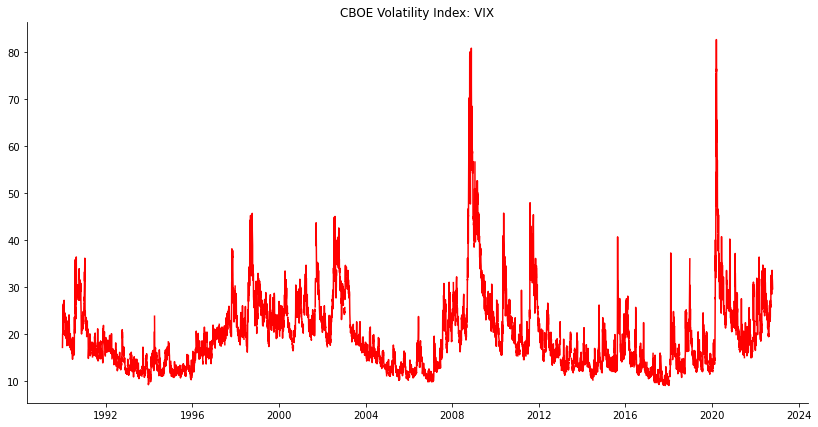

In [12]:
fig, ax = plt.subplots(figsize=(14,7))

ax.plot(vix.index, vix['VIXCLS'], color = 'red')

ax.set_title('CBOE Volatility Index: VIX')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

If we zoom in tight enough, the time axis will relabel in a natural way to reflect the changed time scale. I am going to "zoom in" by changing the limits of the x-axis so that it covers a short period of time. 


When we refer to coordinates in a time series figure, we pass the x-coordinates as a datetime object. Below, we use datetimes to limit the x-axis and to make some annotations. 

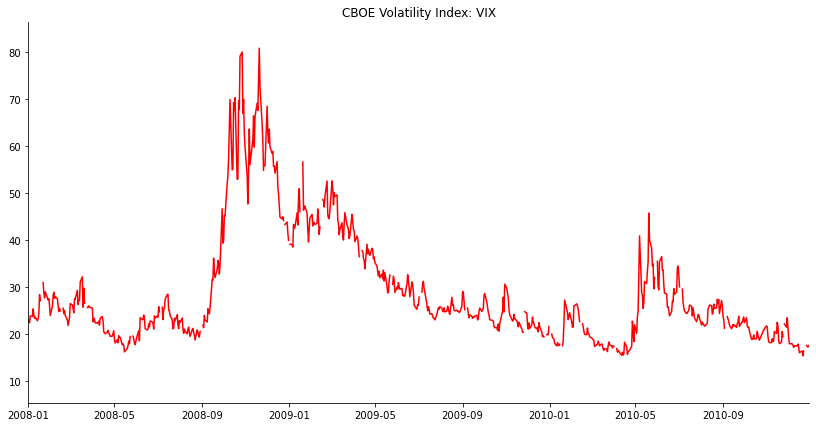

In [13]:
fig, ax = plt.subplots(figsize=(14,7))

ax.plot(vix.index, vix['VIXCLS'], color = 'red')

ax.set_title('CBOE Volatility Index: VIX')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Change the x-axis limits to focus around the Great Recession period. 
# The since the x-axis are dates, the limits are datetime objects.
ax.set_xlim(dt.datetime(2008,1,1), dt.datetime(2010, 12, 31)) 

plt.show()

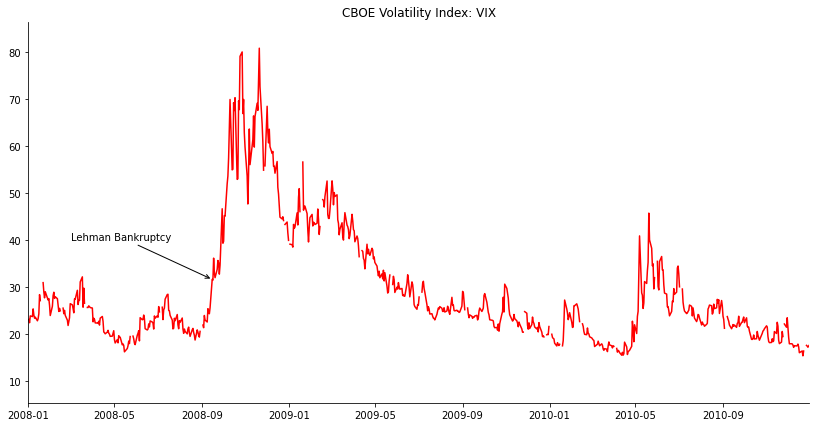

In [14]:
fig, ax = plt.subplots(figsize=(14,7))

ax.plot(vix.index, vix['VIXCLS'], color = 'red')

ax.set_title('CBOE Volatility Index: VIX')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Change the x-axis limits to focus around the Great Recession period. 
# The since the x-axis are dates, the limits are datetime objects.
ax.set_xlim(dt.datetime(2008,1,1), dt.datetime(2010, 12, 31)) 

# Add some annotations. The x-coordinate needs to be a datetime object.
#ax.axvline(dt.datetime(2008,9,15), color='black')
ax.annotate('Lehman Bankruptcy', 
            xy=(dt.datetime(2008,9,15), 31.7), 
            xytext=(dt.datetime(2008,3,1), 40), 
            arrowprops={'facecolor':'black',  'arrowstyle':'->'}
           ) 

plt.show()

## Top Hat Practice Exercise: Dates
Take a few minutes and try the following. Feel free to chat with those around if you get stuck. The TA and I are here, too.

1. Read the file 'osk.csv' into a DataFrame and name it "prices". The file contains daily closing prices for OshKosh Corp. and the S&P500. 
2. Set the index to the date. Make sure the dates are datetime objects!


In [34]:
prices = pd.read_csv('osk.csv', parse_dates=['Date'], index_col='Date')
prices

,osk,sp500
Date,,
2018-01-02,92.169998,2695.810059
2018-01-03,92.029999,2713.060059
2018-01-04,91.279999,2723.989990
2018-01-05,89.970001,2743.149902
2018-01-08,90.660004,2747.709961
...,...,...
2018-09-28,71.239998,2913.979980
2018-10-01,71.099998,2924.590088
2018-10-02,71.190002,2923.429932


3. *Normalize* each series (osk, sp500) by dividing every observation by the value at 01-02-2018. Try 
```python
prices['osk_n'] = prices['osk'] / prices.loc['2018-01-02','osk']
```
and something similar for the S&P500.


In [16]:
prices['osk_n'] = prices['osk'] / prices.loc['2018-01-02', 'osk']
prices['sp500_n'] = prices['sp500'] / prices.loc['2018-01-02', 'sp500']
prices.loc['2018-01-02']

sp500      2695.810000
osk          92.169998
osk_n         1.000000
sp500_n       1.000000
Name: 2018-01-02 00:00:00, dtype: float64

4. Plot the two normalized series. What does normalizing do for us? [You can try plotting the non-normalized data to see the difference.]

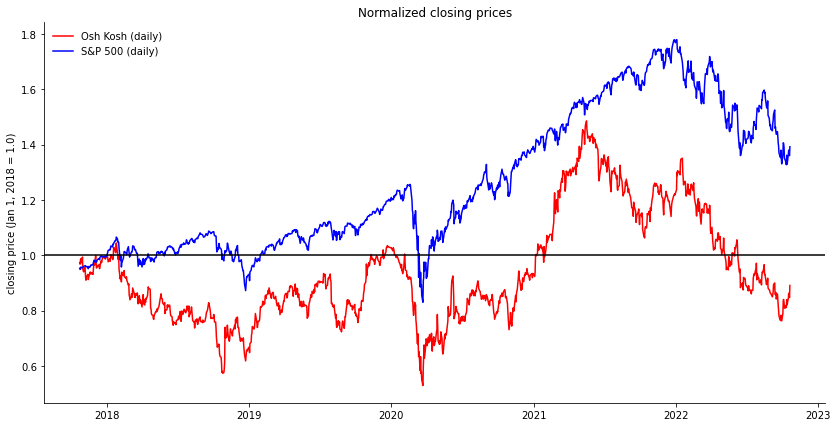

In [17]:
fig, ax = plt.subplots(figsize=(14,7))

ax.plot(prices.index, prices['osk_n'], color = 'red', label = 'Osh Kosh (daily)', alpha = 1)
ax.plot(prices.index, prices['sp500_n'], color = 'blue', label = 'S&P 500 (daily)', alpha = 1)

ax.set_ylabel('closing price (Jan 1, 2018 = 1.0)')
ax.set_title('Normalized closing prices')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.axhline(y=1, color='black')

ax.legend(frameon=False)

plt.show()

### Changing the frequency
We can *resample* the data to change its frequency. 

We are *downsampling* data if we are reducing the number of observations (daily$\rightarrow$monthly) and we are *upsampling* the data if we are increasing the number of observations (monthly$\rightarrow$daily). In my work, I have downsampled a lot. I do not think I have ever upsampled. 

* When we downsample, we need to tell pandas how we want the data aggregated: for example, we might want it summed, or averaged.

* When we resample, we create a new DataFrame to hold the new data. The index in the new data will be of a different frequency than the old data, so it is easiest to have different DataFrames. 

Let's resample to the weekly frequency and take the average over the observations within a week.

In [18]:
vix = pd.read_csv('vix.csv', parse_dates=['DATE'], 
                  index_col='DATE', na_values='.')

# Create a new DataFrame with a weekly index. 
vix_w = vix.resample('w').mean()

print(vix_w.index)
print('\n', vix_w.head())

DatetimeIndex(['1990-01-07', '1990-01-14', '1990-01-21', '1990-01-28',
               '1990-02-04', '1990-02-11', '1990-02-18', '1990-02-25',
               '1990-03-04', '1990-03-11',
               ...
               '2022-08-21', '2022-08-28', '2022-09-04', '2022-09-11',
               '2022-09-18', '2022-09-25', '2022-10-02', '2022-10-09',
               '2022-10-16', '2022-10-23'],
              dtype='datetime64[ns]', name='DATE', length=1712, freq='W-SUN')

             VIXCLS
DATE              
1990-01-07  18.690
1990-01-14  21.918
1990-01-21  24.304
1990-01-28  25.744
1990-02-04  25.648


We had 8,559 daily observations. Now we have 1,712 weekly observations.  Note the weeks are Sunday-based (`W-SUN`). Let's downsample some more. 

In [19]:
vix_m = vix_di.resample('m').mean()   # monthly
vix_y = vix_di.resample('y').mean()   # yearly

vix_y.head()

,VIXCLS
DATE,
1990-12-31,23.063478
1991-12-31,18.373373
1992-12-31,15.452047
1993-12-31,12.686245
1994-12-31,13.925516


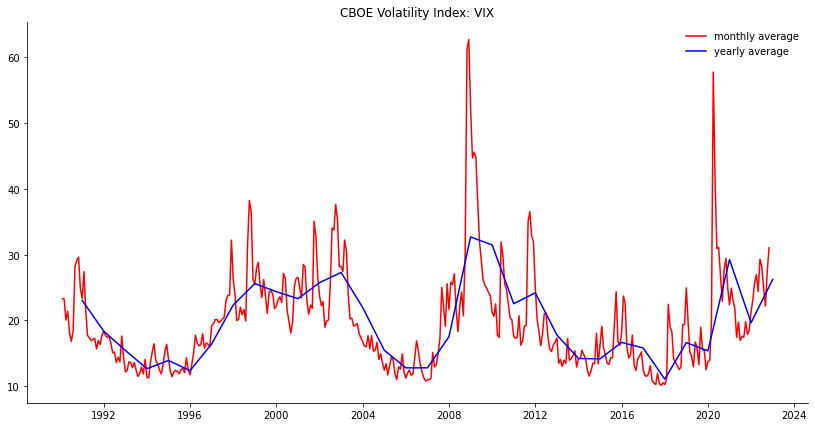

In [20]:
fig, ax = plt.subplots(figsize=(14,7))

ax.plot(vix_m.index, vix_m['VIXCLS'], color = 'red', label = 'monthly average')
ax.plot(vix_y.index, vix_y['VIXCLS'], color = 'blue', label = 'yearly average')

ax.set_title('CBOE Volatility Index: VIX')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend(frameon=False)

plt.show()

Notice that plotting at different frequencies was handled without a problem. Matplotlib/Pandas is handling all the datetime manipulation for us. 

### Slicing with dates
We can slice on a datetime index. This is surprisingly easy. 

Let's start by taking a slice of a single data: 6/18/2008.

Here are two ways. 

In [21]:
# Option 1: Create a datetime and use .loc
date_to_extract = dt.datetime(2008, 6, 18)  

vix.loc[date_to_extract]

VIXCLS    22.24
Name: 2008-06-18 00:00:00, dtype: float64

In [22]:
# Option 2: Query directly with a string
vix_di.loc['2008-06-18']

VIXCLS    22.24
Name: 2008-06-18 00:00:00, dtype: float64

Notice that in the second method, I need to use the standard format of `yyyy-mm-dd`.

We can slice, too. Using the weekly data, let's
1. grab every observation with a year of 2008 with '2008'; and
2. grab every observation between Jan 1, 2008 and Jan 31, 2008 by slicing with '2008/01/01':'2008/01/31'. Python is smart enough to understand references to dates that are not in the DataFrame. There is no January 1 or January 31 observation.

In [23]:
print('Every week in 2008:', vix_w.loc['2008'])  # all the weeks in 2008

Every week in 2008:              VIXCLS
DATE               
2008-01-06  23.0250
2008-01-13  24.0940
2008-01-20  25.2520
2008-01-27  29.2225
2008-02-03  26.5880
2008-02-10  27.7740
2008-02-17  25.8740
2008-02-24  24.7925
2008-03-02  23.5380
2008-03-09  26.2880
2008-03-16  28.2820
2008-03-23  28.6225
2008-03-30  25.8240
2008-04-06  23.4760
2008-04-13  22.6060
2008-04-20  21.5260
2008-04-27  20.2560
2008-05-04  19.5460
2008-05-11  19.1300
2008-05-18  17.2400
2008-05-25  18.1560
2008-06-01  18.6700
2008-06-08  20.6120
2008-06-15  22.9940
2008-06-22  21.7540
2008-06-29  22.7140
2008-07-06  24.5800
2008-07-13  25.4480
2008-07-20  26.2360
2008-07-27  22.3780
2008-08-03  22.5960
2008-08-10  21.3340
2008-08-17  20.5520
2008-08-24  20.2620
2008-08-31  20.2600
2008-09-07  22.6275
2008-09-14  24.5360
2008-09-21  32.9260
2008-09-28  34.4640
2008-10-05  43.2640
2008-10-12  59.4260
2008-10-19  63.4620
2008-10-26  64.5320
2008-11-02  67.9540
2008-11-09  55.1500
2008-11-16  62.8040
2008-11-23  72.9160


In [24]:
# All of the weeks in January 2008.
print('\nEvery week in Jan 2008:', vix_w.loc['2008/01/01':'2008/01/31']) 
print('Every week in Jan 2008:', vix_w.loc['2008-01'])  


Every week in Jan 2008:              VIXCLS
DATE               
2008-01-06  23.0250
2008-01-13  24.0940
2008-01-20  25.2520
2008-01-27  29.2225
Every week in Jan 2008:              VIXCLS
DATE               
2008-01-06  23.0250
2008-01-13  24.0940
2008-01-20  25.2520
2008-01-27  29.2225


## Bonus Practice to Try at Home

Continuing work with the `prices` DataFrame you created earlier. It containes the normalized prices of OshKosh and the SP500.


If you didn't finish the last practice, run this code to create the daily data:

```python
prices = pd.read_csv('osk.csv', parse_dates=['Date'], index_col='Date')
prices['osk_n'] = prices['osk'] / prices.loc['2018-01-02,','osk']
prices['sp500_n'] = prices['sp500'] / prices.loc['2018-01-02,','sp500']
```

5. Resample the (non-normalized) data for OshKosh and SP500 to a weekly frequency, creating average weekly prices. Name the new DataFrame with the weekly data `prices_w`. 
6. Normalize the two weekly series, like you did in step 3., but this time dividing by the first week of the year.

In [25]:
# 5. Resample to weekly frequency. Take averages.
prices_w = prices.resample('w').mean()

# 6. Normalize. The first week of the year is 2018-01-07.
prices_w['osk_n'] = prices_w['osk'] / prices_w.loc['2018-01-07,','osk']
prices_w['sp500_n'] = prices_w['sp500'] / prices_w.loc['2018-01-07,','sp500']

prices_w.head(15)

,sp500,osk,osk_n,sp500_n
Date,,,,
2017-10-29,2566.9375,90.122500,0.986428,0.944073
2017-11-05,2579.0280,88.492000,0.968581,0.948520
2017-11-12,2588.6140,85.844002,0.939598,0.952045
2017-11-19,2578.5640,85.049999,0.930907,0.948349
2017-11-26,2595.1675,86.267500,0.944233,0.954456
2017-12-03,2628.8660,88.211999,0.965516,0.966849
2017-12-10,2637.3520,89.272000,0.977119,0.969970
2017-12-17,2662.9540,88.445999,0.968078,0.979386
2017-12-24,2683.7580,90.542000,0.991019,0.987038


7. Add the weekly data to your figure from part 4. Use the `alpha` option to lighten up the daily data lines. 
8. How does your plot look? Are the titles correct? Is there a legend or some other way of identifying the lines?
9. How has fading the daily changed the message of the figure? Why leave the daily data at all?

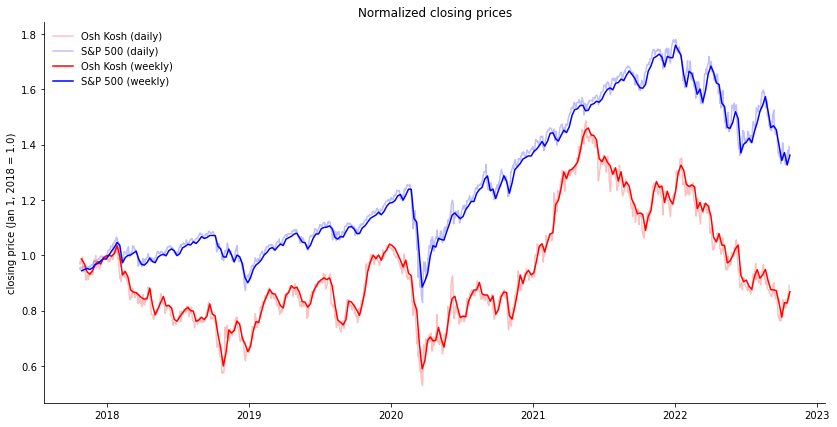

In [26]:
fig, ax = plt.subplots(figsize=(14,7))
ax.plot(prices.index, prices['osk_n'], color = 'red', label = 'Osh Kosh (daily)', alpha = 0.25)
ax.plot(prices.index, prices['sp500_n'], color = 'blue', label = 'S&P 500 (daily)', alpha = 0.25)

ax.plot(prices_w.index, prices_w['osk_n'], color = 'red', label = 'Osh Kosh (weekly)')
ax.plot(prices_w.index, prices_w['sp500_n'], color = 'blue', label = 'S&P 500 (weekly)')

#ax.set_xlim( dt.datetime(2008,1,1), dt.datetime(2010, 12, 31) ) # The limits need datetime objects
ax.set_ylabel('closing price (Jan 1, 2018 = 1.0)')
ax.set_title('Normalized closing prices')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend(frameon=False)

plt.show()

Fading the daily data puts the reader's focus on the weekly data. The message is about the trends: "OshKosh's price fell while the SP500 grew."

I have left the daily data in the figure so that the reader can get a sense of the volatility in the underlying data, which is lost when we take weekly averages.